In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sns.set_style('dark')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PosPuc/TCC/datasets/acidentes_ocorrencia/df_final_eda.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325862 entries, 0 to 325861
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   dia_semana              325862 non-null  object
 1   uf                      325862 non-null  object
 2   br                      325862 non-null  int64 
 3   tipo_acidente_agg       325862 non-null  object
 4   fase_dia_agg            325862 non-null  object
 5   pessoas                 325862 non-null  int64 
 6   km_intervalo            325862 non-null  object
 7   mes                     325862 non-null  int64 
 8   cond_metereologica_agg  325862 non-null  object
dtypes: int64(3), object(6)
memory usage: 22.4+ MB


In [ ]:
df.head()

,dia_semana,uf,br,tipo_acidente_agg,fase_dia_agg,pessoas,km_intervalo,mes,cond_metereologica_agg
0,SEGUNDA,RJ,116,ATROPELAMENTO,NOITE,1,[300 - 350],1,CHUVA
1,SEGUNDA,RJ,101,COLISAO,NOITE,2,[300 - 350],1,CHUVA
2,SEGUNDA,SP,116,TOMBAMENTO,NOITE,1,[550 - 600],1,CHUVA
3,SEGUNDA,SP,116,COLISAO,NOITE,2,[100 - 150],1,CHUVA
4,SEGUNDA,RJ,116,COLISAO,NOITE,1,[150 - 200],1,CHUVA


In [ ]:
df_group = df.groupby(['dia_semana', 'uf', 'br', 'tipo_acidente_agg', 'fase_dia_agg', 'km_intervalo', 'mes', 'cond_metereologica_agg'], as_index=False).agg({'pessoas': 'sum'})

In [ ]:
df_group.shape

(81407, 9)

In [ ]:
df_group.head(10)

,dia_semana,uf,br,tipo_acidente_agg,fase_dia_agg,km_intervalo,mes,cond_metereologica_agg,pessoas
0,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[0 - 50],4,CEU CLARO,2
1,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[0 - 50],5,CHUVA,2
2,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[0 - 50],12,CEU CLARO,2
3,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[100 - 150],4,CHUVA,1
4,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[100 - 150],4,NUBLADO,2
5,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[100 - 150],9,NUBLADO,1
6,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[150 - 200],11,CHUVA,2
7,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[200 - 250],1,NUBLADO,4
8,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[200 - 250],2,NUBLADO,2
9,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[200 - 250],8,CEU CLARO,2


### Check features balance

In [ ]:
def plot_count_feature_percentage(df, feature):
    df[feature].value_counts(normalize=True).plot(kind='bar')
    plt.show()

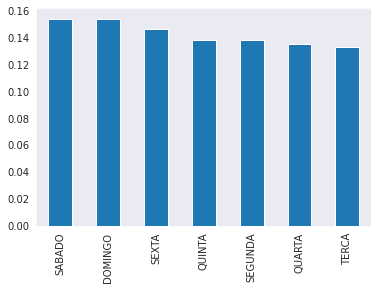

In [ ]:
# Dia Semana
plot_count_feature_percentage(df_group, 'dia_semana')

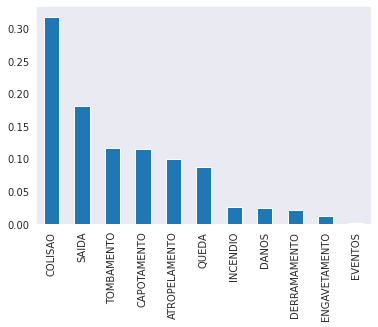

In [ ]:
# Tipo acidente
plot_count_feature_percentage(df_group, 'tipo_acidente_agg')

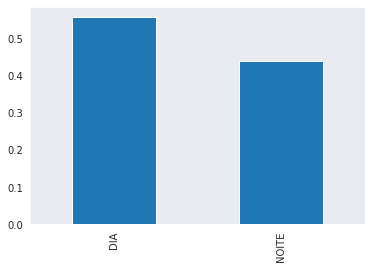

In [ ]:
# Fase dia
plot_count_feature_percentage(df_group, 'fase_dia_agg')

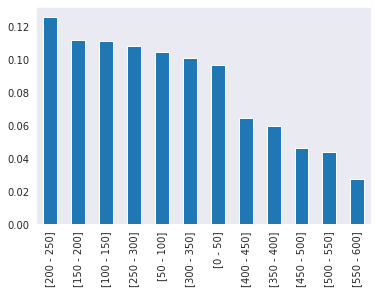

In [ ]:
# Km_intervalo
plot_count_feature_percentage(df_group, 'km_intervalo')

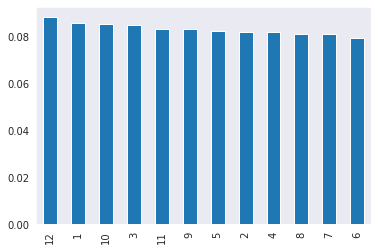

In [ ]:
# Mes
plot_count_feature_percentage(df_group, 'mes')

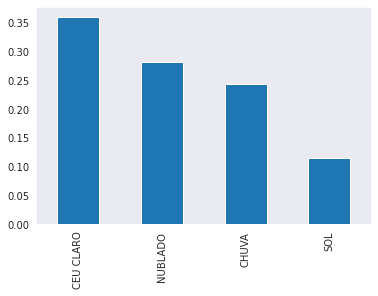

In [ ]:
# Condicao Metereologica
plot_count_feature_percentage(df_group, 'cond_metereologica_agg')

### Conclusions
- The tipo_acidente INCENDIO, DANOS, DERRAMAMENTO, ENGAVETAMENTO and EVENTOS will be grouped to category OUTROS, because they appear in few cases;
- Map of feature mes in names;

In [ ]:
# Treatment tipo_acidente
tipo_acidente_few = ['INCENDIO', 'DANOS', 'DERRAMAMENTO', 'ENGAVETAMENTO', 'EVENTOS']

In [ ]:
df_group['tipo_acidente_agg'] = df_group.apply(lambda x: 'OUTROS' if x.tipo_acidente_agg in tipo_acidente_few else x.tipo_acidente_agg, axis=1)

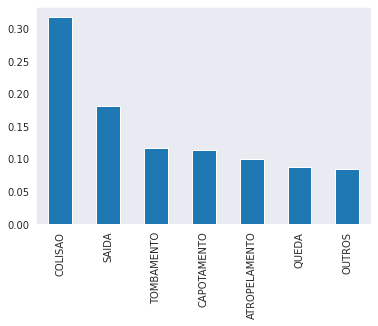

In [ ]:
plot_count_feature_percentage(df_group, 'tipo_acidente_agg')

In [ ]:
# Treatment mes
map_weekday = {1: 'JAN', 2: 'FEV', 3: 'MAR', 4: 'ABR', 5: 'MAI', 6: 'JUN', 7: 'JUL', 8: 'AGO', 9: 'SET', 10: 'OUT', 11: 'NOV', 12: 'DEZ'}
df_group['mes'] = df_group.apply(lambda x: map_weekday[x.mes], axis=1)

In [ ]:
# Rename columns
df_group.rename(columns={'tipo_acidente_agg': 'tipo_acidente', 'fase_dia_agg': 'fase_dia', 'cond_metereologica_agg': 'cond_metereologica'}, inplace=True)

In [ ]:
df_group.head(10)

,dia_semana,uf,br,tipo_acidente,fase_dia,km_intervalo,mes,cond_metereologica,pessoas
0,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[0 - 50],ABR,CEU CLARO,2
1,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[0 - 50],MAI,CHUVA,2
2,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[0 - 50],DEZ,CEU CLARO,2
3,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[100 - 150],ABR,CHUVA,1
4,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[100 - 150],ABR,NUBLADO,2
5,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[100 - 150],SET,NUBLADO,1
6,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[150 - 200],NOV,CHUVA,2
7,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[200 - 250],JAN,NUBLADO,4
8,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[200 - 250],FEV,NUBLADO,2
9,DOMINGO,RJ,101,ATROPELAMENTO,DIA,[200 - 250],AGO,CEU CLARO,2


In [ ]:
# Split base in train, test, validation
df_group.reset_index(drop=True, inplace=True)

from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(df_group.iloc[:, 0:-1], df_group.iloc[:, -1], test_size=0.25)
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, test_size=0.4)

In [ ]:
# Save dataframes
def save_dataframe(df, filename):
    df.to_csv(f'/content/drive/MyDrive/PosPuc/TCC/datasets/acidentes_ocorrencia/{filename}.csv', index=False, encoding='utf-8')

dfs = [x_train, y_train, x_test, y_test, x_valid, y_valid]
dfs_name = ['x_train', 'y_train', 'x_test', 'y_test', 'x_valid', 'y_valid']

for i, x in zip(dfs, dfs_name):
    save_dataframe(i, x)